In [7]:
import numpy as np  # библиотека для матриц и математики
import pandas as pd  # библиотека для работы с табличками
from scipy import stats  # модуль для работы со статистикой
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb
from math import sqrt
import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

In [8]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(1)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,N,502,419,369,431,N,54,43,29,11,137,N
1069,3827,West Virginia University,WV,I,535,431,361,439,Y,642,521,438,529,N,335,237,272,22,895,Y
1070,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,N,572,494,434,495,N,25,22,24,3,74,N
1071,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,N,486,416,348,381,N,8,20,25,12,65,N


In [13]:
X1 = df.A15.to_numpy()
X2 = df.A5.to_numpy()
Y = df.A13.to_numpy()

In [14]:
F = np.array([np.array([1]*len(X1)), X1, X2]).transpose()
dF = np.dot(F.transpose(), F)
result = np.dot(np.linalg.inv(dF), F.transpose()).dot(Y)
beta_0 = result[0]
beta_1 = result[1]
beta_2 = result[2]
print(f"beta0 = {result[0]} \nbeta1 = {result[1]} \nbeta2 = {result[2]}")

beta0 = 40.18020659912621 
beta1 = 0.03709282783387437 
beta2 = 0.9356917398844753


In [15]:
def f(x1, x2):
    return beta_0 + beta_1 * x1 + beta_2 * x2

In [18]:
n = len(X1)

D_res = np.sum((Y - f(X1, X2)) ** 2) / n

D_YX = np.sum((f(X1, X2) - np.mean(Y)) ** 2) / n

D_Y = np.var(Y)

print(f"Факторный признак: {D_YX:.2f}")
print(f"Остаточные признаки: {D_res:.2f}")
print(f"Все признаки: {D_Y:.2f}")
print(f"Проверка суммы: {D_YX + D_res:.2f}")

Факторный признак: 12834.70
Остаточные признаки: 1195.79
Все признаки: 14030.49
Проверка суммы: 14030.49


In [19]:
R_YX2 = D_YX / D_Y
R_YX2, np.sqrt(R_YX2)

(0.9147720920588261, 0.9564371866771106)

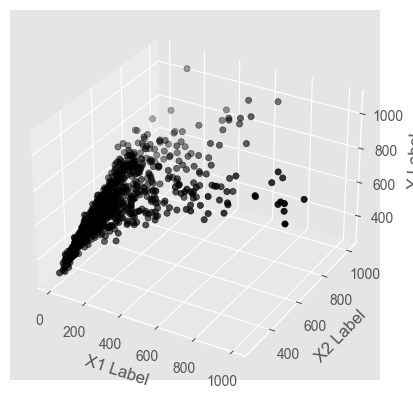

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, Y,  color='black')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()